In [3]:
import pandas as pd
import seaborn as sns
import numpy as np

In [4]:
import pandas as pd
df = pd.read_csv('https://query.data.world/s/f7ceph5l2xtfjvwbazveljksqxql6q?dws=00000')

In [9]:
df.columns

Index(['Unnamed: 0', 'active_from', 'active_to', 'birth_date', 'college',
       'height', 'name', 'position', 'url', 'weight', 'NBA__3ptapg',
       'NBA__3ptpct', 'NBA__3ptpg', 'NBA_efgpct', 'NBA_fg%', 'NBA_fg_per_game',
       'NBA_fga_per_game', 'NBA_ft%', 'NBA_ft_per_g', 'NBA_fta_p_g',
       'NBA_g_played', 'NBA_ppg', 'NCAA__3ptapg', 'NCAA__3ptpct',
       'NCAA__3ptpg', 'NCAA_efgpct', 'NCAA_fgapg', 'NCAA_fgpct', 'NCAA_fgpg',
       'NCAA_ft', 'NCAA_ftapg', 'NCAA_ftpg', 'NCAA_games', 'NCAA_ppg'],
      dtype='object')

In [12]:
df.describe()["NCAA_games"]

count    2598.000000
mean       98.307544
std        30.447005
min        11.000000
25%        76.000000
50%       106.000000
75%       123.000000
max       152.000000
Name: NCAA_games, dtype: float64

In [13]:
time_span = [2004,2018]
subset = df[(df["active_from"] >= time_span[0]) & (df["active_to"] <= time_span[1]) & (df["NBA_g_played"] >= 134) & (df["NCAA_games"] >= 106)]
subset.head()

,Unnamed: 0,active_from,active_to,birth_date,college,height,name,position,url,weight,...,NCAA__3ptpg,NCAA_efgpct,NCAA_fgapg,NCAA_fgpct,NCAA_fgpg,NCAA_ft,NCAA_ftapg,NCAA_ftpg,NCAA_games,NCAA_ppg
14,14,2013,2018,"October 6, 1990",Baylor University,6-7,Quincy Acy,F,/players/a/acyqu01.html,240.0,...,0.0,NaN,6.0,0.602,3.6,0.708,3.6,2.5,139.0,9.8
25,25,2011,2015,"February 10, 1986",University of Connecticut,6-7,Jeff Adrien,F,/players/a/adrieje01.html,245.0,...,0.0,NaN,8.8,0.515,4.5,0.606,4.9,3.0,133.0,12.1
39,39,2011,2018,"October 31, 1988",University of Kansas,6-11,Cole Aldrich,C,/players/a/aldrico01.html,250.0,...,0.0,NaN,6.1,0.574,3.5,0.729,3.2,2.3,111.0,9.4
54,54,2012,2017,"February 4, 1989",Temple University,6-9,Lavoy Allen,F-C,/players/a/allenla01.html,260.0,...,0.1,NaN,8.2,0.534,4.4,0.671,2.4,1.6,135.0,10.5
71,71,2007,2016,"December 7, 1982","University of Nevada, Las Vegas",6-9,Lou Amundson,F,/players/a/amundlo01.html,220.0,...,0.0,NaN,5.4,0.535,2.9,0.503,3.0,1.5,120.0,7.2


In [32]:
subset["3ptpct_diff"] = subset["NBA__3ptpct"] - subset["NCAA__3ptpct"]

/var/folders/g1/9sc25jzn7fdgvxb50169_b9m0000gn/T/ipykernel_24144/937207486.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset["3ptpct_diff"] = subset["NBA__3ptpct"] - subset["NCAA__3ptpct"]


In [33]:
subset["3ptpct_diff"].describe()

count    170.000000
mean      -0.043159
std        0.149488
min       -1.000000
25%       -0.064750
50%       -0.017000
75%        0.013250
max        0.400000
Name: 3ptpct_diff, dtype: float64

<AxesSubplot:>

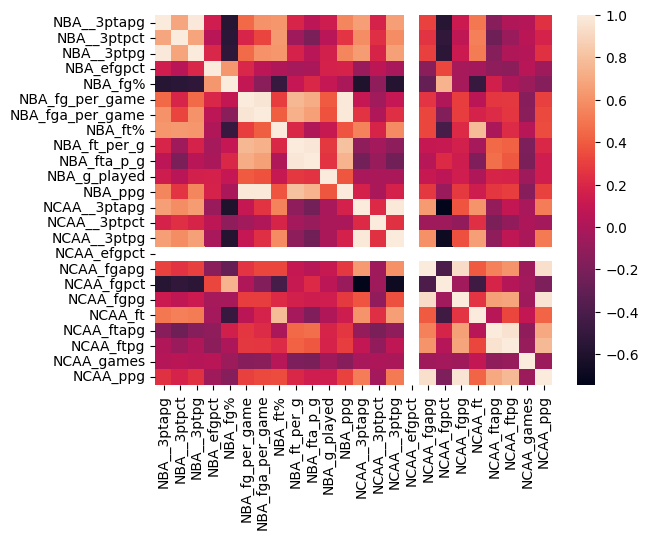

In [17]:
num = subset[['NBA__3ptapg',
       'NBA__3ptpct', 'NBA__3ptpg', 'NBA_efgpct', 'NBA_fg%', 'NBA_fg_per_game',
       'NBA_fga_per_game', 'NBA_ft%', 'NBA_ft_per_g', 'NBA_fta_p_g',
       'NBA_g_played', 'NBA_ppg', 'NCAA__3ptapg', 'NCAA__3ptpct',
       'NCAA__3ptpg', 'NCAA_efgpct', 'NCAA_fgapg', 'NCAA_fgpct', 'NCAA_fgpg',
       'NCAA_ft', 'NCAA_ftapg', 'NCAA_ftpg', 'NCAA_games', 'NCAA_ppg']]

sns.heatmap(num.corr())

<AxesSubplot:xlabel='NCAA__3ptpct', ylabel='NBA__3ptpct'>

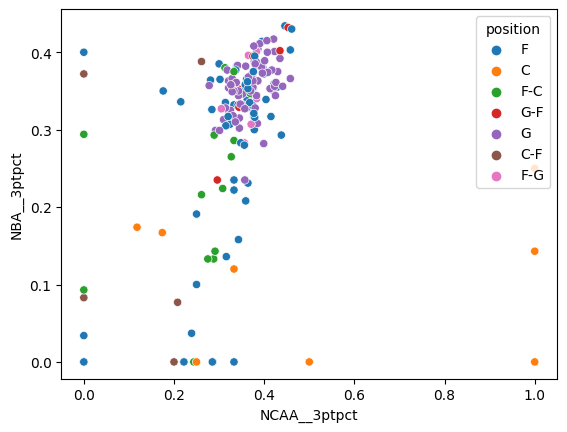

In [24]:
sns.scatterplot(data =subset, y = "NBA__3ptpct", x = "NCAA__3ptpct",hue = "position", markers = "position")\

<AxesSubplot:xlabel='NCAA_ppg', ylabel='NBA_ppg'>

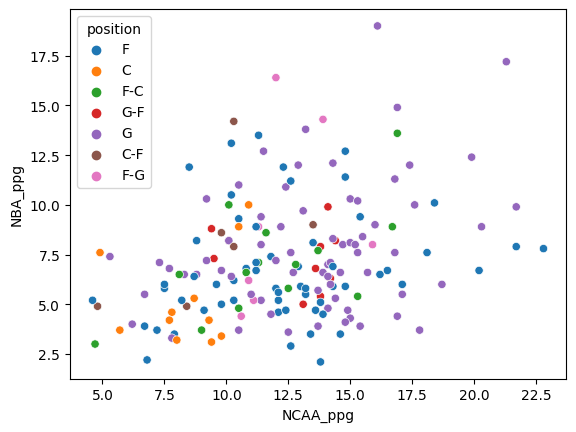

In [28]:
sns.scatterplot(data =subset, y = "NBA_ppg", x = "NCAA_ppg",hue = "position")

In [36]:
improved = subset[subset["3ptpct_diff"] > 0.0]

<AxesSubplot:xlabel='NCAA__3ptpct', ylabel='NBA__3ptpct'>

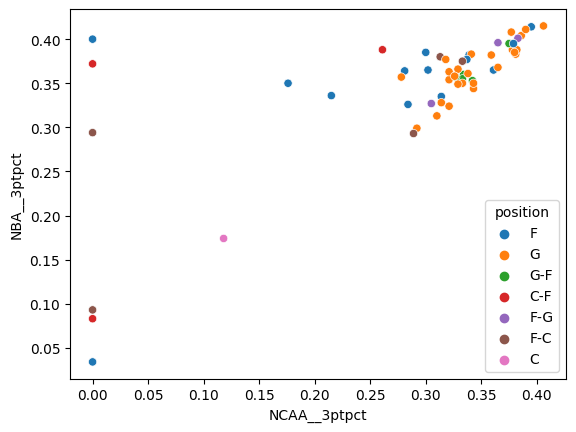

In [37]:
sns.scatterplot(data =improved, y = "NBA__3ptpct", x = "NCAA__3ptpct",hue = "position", markers = "position")